# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

    total_images           last_price           total_area  \
0             20        13,000,000.00               108.00   
1              7         3,350,000.00                40.40   
2             10         5,196,000.00                56.00   
3              0        64,900,000.00               159.00   
4              2        10,000,000.00               100.00   
5             10         2,890,000.00                30.40   
6              6         3,700,000.00                37.30   
7              5         7,915,000.00                71.60   
8             20         2,900,000.00                33.16   
9             18         5,400,000.00                61.00   
10             5         5,050,000.00                39.60   
11             9         3,300,000.00                44.00   
12            10         3,890,000.00                54.00   
13            20         3,550,000.00                42.80   
14             1         4,400,000.00                36.00   
15      

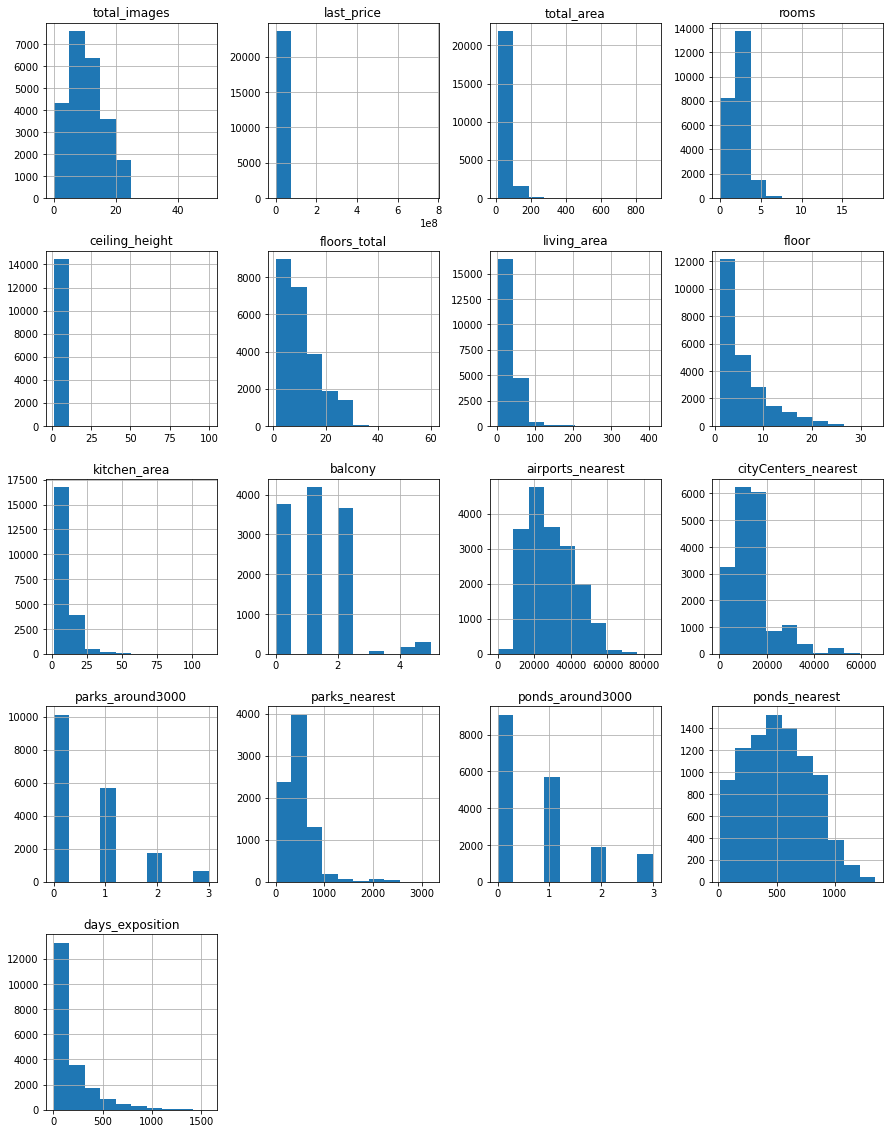

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore") 
pd.options.display.float_format = '{:20,.2f}'.format

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(20))
print(data.info())
data.hist(figsize=(15, 20))
plt.show()

### Выполните предобработку данных
#### Заполнение пропусков в данных
Для начала изучим количество пропусков по всем столбцам 

In [2]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Можно предположить, что столбцы с наибольшим количеством пропусков, несущие информацию об аппартаментах, балконах, наличию прудов и парков рядом имеют такие большие показатели из-за того, что скорее всего при составлении обьявлений люди, которые описывали квартиру не заполнили эти пункты, так как это не являлось преимуществом квартиры, и не имело особого значения при продаже/сдаче. Смею предположить, что в случае с аппартаментами и наличием балконов можно смело заменить все пропуски на False(так как столбец имеет булевый тип переменных), так как если на этом не заострили внимание, то скорее всего этого и нет. <br/>
А вот что делать с прудами пока не понятно)


In [3]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Значения в столбцах которые показывают количество ближайших парков и прудов имеют количество пропусков, доходящее почти до 65% всех строк. Из этого делаем выводы, что никакие существенные выводы по данным показателям мы сделать не сможем, так как заменять больше половины значений на примерные не имеет смысла для проведения исследования. Думаю, влияние данных факторов можно полностью исключить.

In [4]:
data2 = data.drop(['parks_nearest','ponds_nearest'], axis = 1)
data2.info()
data2.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
ponds_around3000        5518
days_exposition         3181
dtype: int64

Пропусков в столбцах об этажности здания и названии населенного пункта достаточно мало для того чтобы сильно повлиять на данные. Строки с ними можно просто удалить

In [5]:
data2 = data2.dropna(subset=['floors_total','locality_name']) 
data2.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000        5500
ponds_around3000        5500
days_exposition         3171
dtype: int64

Довольно много пропусков в столбце с высотой потолков. Логичным будет заменить все пропуски на медианное значение

In [6]:
data2['ceiling_height'] = data2['ceiling_height'].fillna(data2['ceiling_height'].median())
data2.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000        5500
ponds_around3000        5500
days_exposition         3171
dtype: int64

А также, жилую площадь и площадь кухни можно заменить медианными значениями, так как пропусков не так много. Это сохранит данные и не особо сильно скажется на последующем анализе


In [7]:
data2['living_area'] = data2['living_area'].fillna(data2['living_area'].median())
print(data2['living_area'].median())
data2['kitchen_area'] = data2['kitchen_area'].fillna(data2['kitchen_area'].median())
print(data2['kitchen_area'].median())
data2.isna().sum()

30.0
9.1


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000        5500
ponds_around3000        5500
days_exposition         3171
dtype: int64

Основные и самые важные данные теперь полностью заполнены. Пропуски в оставшихся столбцах решено пока что оставить без изменений, в дальнейшем будет видно, критическое ли отсутствие этих данных или нет. В любом случае, убрать данные можно всегда, а данные для этих столбцов нам брать неоткуда. По всей видимости эти данные были собраны автоматически и не совсем корректно, в следствии чего остались пробелы.

#### Изменение типов данных
<br/>
Изучив данные поближе, можно увидеть что в некоторых столбцах целые числа записаны типом float64, а время записано в тип object. Надо перевести такие данные в целочисленный тип int64 и datetime для более удобной дальнешей работы.



In [8]:
data2['floors_total'] = data2['floors_total'].astype('Int64', errors = 'ignore')
data2['balcony'] = data2['balcony'].astype('Int64', errors = 'ignore')
data2['parks_around3000'] = data2['parks_around3000'].astype('Int64', errors = 'ignore')
data2['airports_nearest'] = data2['airports_nearest'].astype('Int64', errors = 'ignore')
data2['ponds_around3000'] = data2['ponds_around3000'].astype('Int64', errors = 'ignore')
data2['days_exposition'] = data2['days_exposition'].astype('Int64', errors = 'ignore')


In [9]:
data2['first_day_exposition'] = pd.to_datetime(data2['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Теперь типы переменных больше похожи на действительные и нам будет легче с ними работать.

#### Устранение дубликатов


Начнем с самого простого, проверим есть ли явные дубликаты

In [10]:
data2.duplicated().sum()

0

Явных дубликатов не оказалось, поищем неявные. У нас есть только один столбец, в котором типом данных является object. Значит неявные дубликаты мы можем встретить только там. Выведем все уникальные значения.

In [11]:
data2['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Для более простого анализа удалим все уточняющие слова, которые не являются названием населенного пункта

In [12]:
def change_locality_name(name):
    name = str(name).lower().replace('ё', 'е')
    types = ['поселок городского типа', 'городской поселок', 'поселок', 'пок', 'городской', 'деревня', 'село', 'садовое товарищество','садоводческое некоммерческое товарищество', 'коттеджный поселок']
    for type_ in types:
        if name.startswith(type_):
            name = name.replace(type_, '').strip()
            break
    name = " ".join(name.split())
    return name

data2['normalized_locality_name'] = data2['locality_name'].apply(change_locality_name)

#убедимся что схожих названий и опечаток не осталось, выведя список по алфавиту и просмотрев его
sorted(data2['normalized_locality_name'].unique(), key=lambda s: s.encode('utf-8'))


['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жил',
 'жилгородок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичево',
 'имени морозова',
 'имени свердлова',
 

Выведя список уникальных значений всех наименований населенных пунктов и просмотря его несоколько раз, неявных дубликатов замечено не было. Далее анализ будем проводить по новому столбцу с обработанными наименованиями.

### Добавьте в таблицу новые столбцы

In [13]:
#создаем новый столбец, в котором вычислим цену за квадратный метр
data2['price_m2'] = (data2['last_price']/data2['total_area']).round(2)
#print(data2['price_m2'])


In [14]:
#создадим столбец с днем недели, в который была выложена публикация
data2['weekday_of_exp'] = data2['first_day_exposition'].dt.weekday
#такой же столбец с месяцем публикации
data2['mounth_of_exp'] = data2['first_day_exposition'].dt.month
#такой же столбец с годом публикации
data2['year_of_exp'] = data2['first_day_exposition'].dt.year

Далее, для более удобного анализа, распределим все этажи на 3 типа: «первый», «последний», «другой». Это позволит нам сделать определенные выводы для каждой из групп

In [15]:
#создадим столбец тип этажа и будем выполнять функцию и добавлять в конец значение
def type_of_floor(i):
    if i['floor'] == 1:
        return 'первый'
    elif i['floor'] == i['floors_total']:
        return 'последний'
    return 'другой'

data2['type_of_floor'] = data2.apply(type_of_floor, axis = 1)
data2['type_of_floor']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: type_of_floor, Length: 23565, dtype: object

Создадим столбец с расстоянием до центра в км 

In [16]:
data2['cityCenter_km'] = data2['cityCenters_nearest']/1000
data2['cityCenter_km'].astype(float).round()


0                      16.00
1                      19.00
2                      14.00
3                       7.00
4                       8.00
                ...         
23694                   4.00
23695                    NaN
23696                    NaN
23697                  10.00
23698                    NaN
Name: cityCenter_km, Length: 23565, dtype: float64


### Проведите исследовательский анализ данных

#### Анализ основных параметров на наличие выбросов 
##### Общая площадь

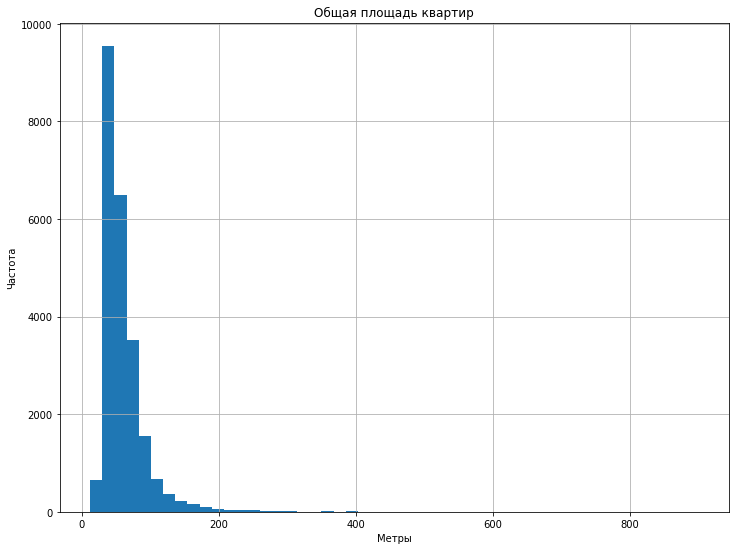

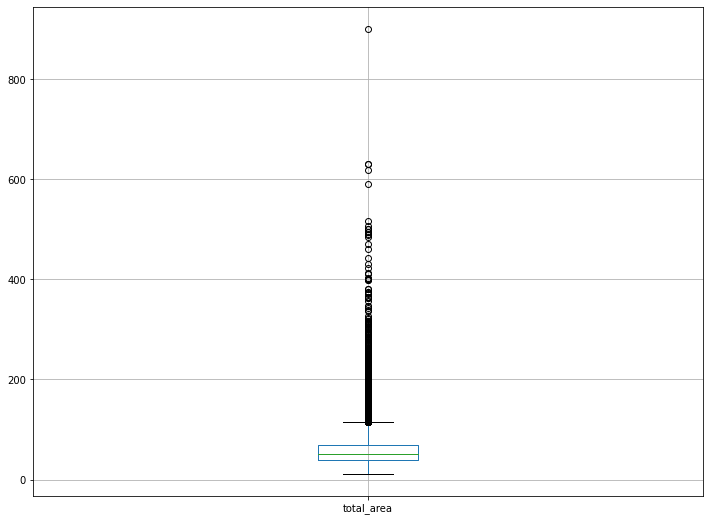

count              23,565.00
mean                   60.32
std                    35.66
min                    12.00
25%                    40.00
50%                    52.00
75%                    69.70
max                   900.00
Name: total_area, dtype: float64

In [17]:
data2['total_area'].hist( bins = 50, figsize = (12,9))
plt.title('Общая площадь квартир')
plt.xlabel('Метры')
plt.ylabel('Частота')
plt.show()
data2.boxplot('total_area',figsize = (12,9))
plt.show()

data2['total_area'].describe()

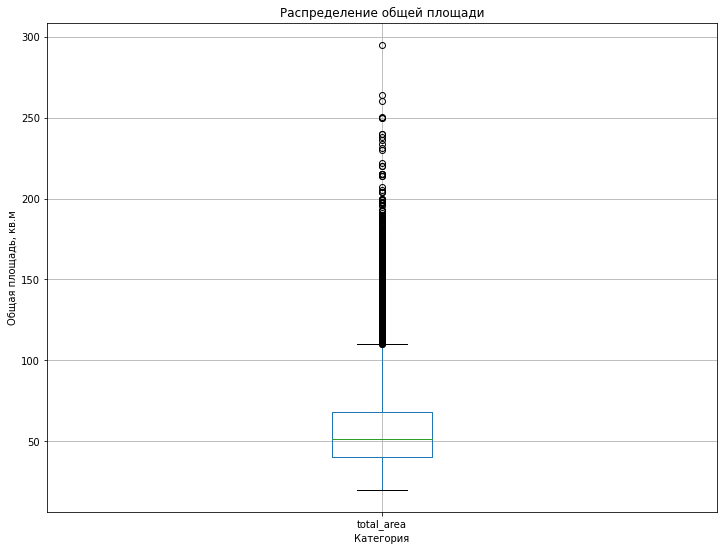

In [67]:
# Код ревьюера

# Создание боксплота
data2.boxplot('total_area', figsize=(12, 9))

# Добавление заголовка и подписей к осям
plt.title('Распределение общей площади')
plt.xlabel('Категория')
plt.ylabel('Общая площадь, кв.м')

# Отображение графика
plt.show()

In [18]:
data2['total_area'].sort_values(ascending = False).head(20)

19540                 900.00
12859                 631.20
3117                  631.00
15651                 618.00
5358                  590.00
4237                  517.00
8018                  507.00
15016                 500.00
5893                  500.00
12401                 495.00
9826                  494.10
22494                 491.00
6621                  488.00
660                   483.90
6221                  470.30
20273                 460.80
3676                  441.98
21955                 431.00
22131                 422.20
14991                 413.50
Name: total_area, dtype: float64

Можно заметить, что и на графике, и в списке самых больших значений есть те, которые на порядок выше не то что среднего значения, но и своих ближайших соседей. Такие значения можно принять за выбросы и исключить их. Что-то мне подсказывает, что можно исключить квартиры, площадь которых больше 300 м кв, а так же те, которые меньше 20 м кв.

In [19]:
data2 = data2.query('20 <= total_area <= 300')
data2['total_area'].sort_values(ascending = False).head(20)

20919                 300.00
8038                  300.00
23005                 297.50
10181                 295.00
15701                 293.60
15017                 293.60
16915                 292.20
1188                  290.60
18891                 290.00
22345                 290.00
4536                  290.00
13139                 288.00
22238                 287.50
16461                 285.70
11319                 284.00
19977                 283.30
5534                  283.00
4199                  281.10
464                   280.30
6728                  280.00
Name: total_area, dtype: float64

Так значения больше напоминают реальные

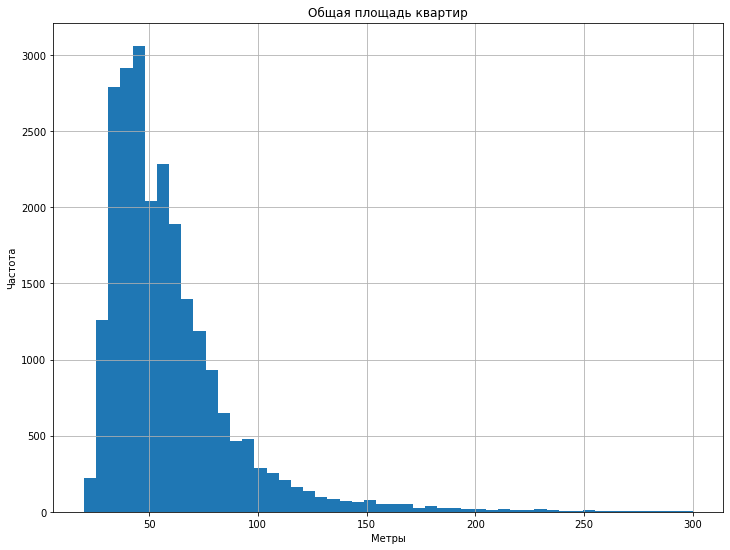

In [20]:
data2['total_area'].hist(bins = 50, figsize = (12,9)) 
plt.title('Общая площадь квартир')
plt.xlabel('Метры')
plt.ylabel('Частота')
plt.show()

##### Жилая площадь

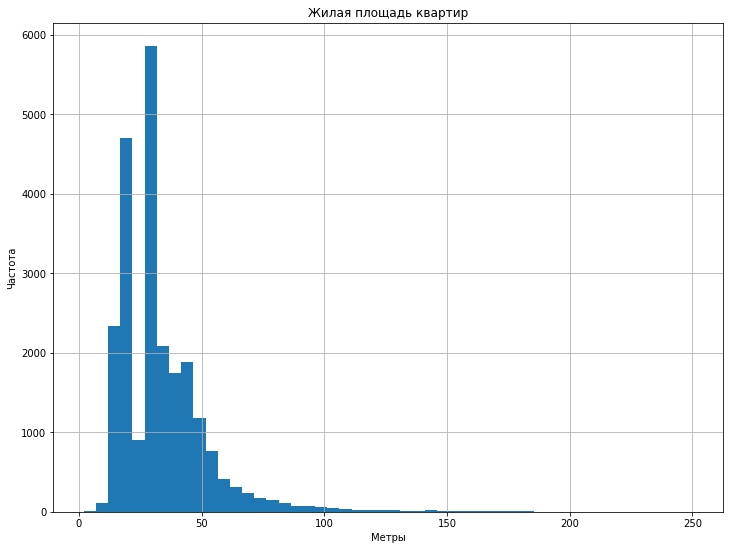

count              23,477.00
mean                   33.73
std                    19.10
min                     2.00
25%                    19.00
50%                    30.00
75%                    41.00
max                   250.00
Name: living_area, dtype: float64

In [21]:
data2['living_area'].hist(bins = 50, figsize = (12,9)) 
plt.title('Жилая площадь квартир')
plt.xlabel('Метры')
plt.ylabel('Частота')
plt.show()
data2['living_area'].describe()

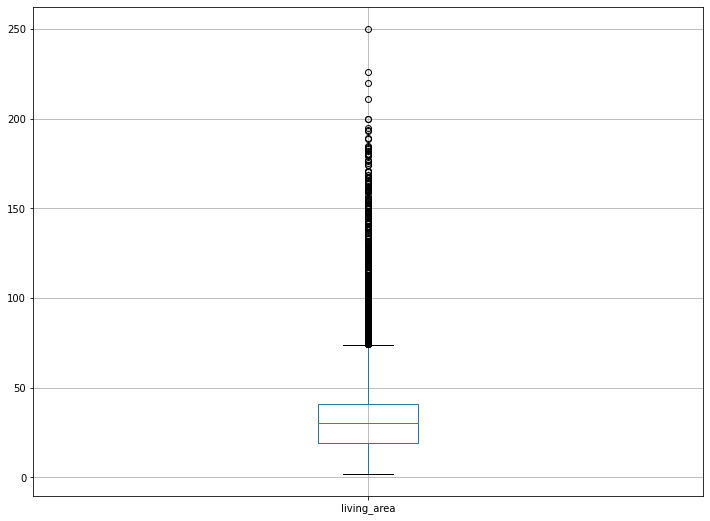

In [22]:
data2.boxplot('living_area',figsize = (12,9))
plt.show()

In [23]:
data2['living_area'].sort_values(ascending = False).head(20)

15701                 250.00
16915                 225.90
7857                  220.00
21685                 211.00
22907                 200.00
10246                 200.00
6728                  195.00
4199                  193.50
7694                  193.00
18891                 189.40
1188                  188.70
8742                  184.90
3043                  184.00
22238                 183.70
16461                 182.80
23005                 181.80
22835                 180.00
22345                 180.00
4823                  180.00
18848                 180.00
Name: living_area, dtype: float64

Хоть выбросов и много, уберем хотя бы самую редкую часть из них. Все, что больше 125 и меньше 4.

In [24]:
data2 = data2.query('4 <= living_area <=125')

##### Площадь кухни

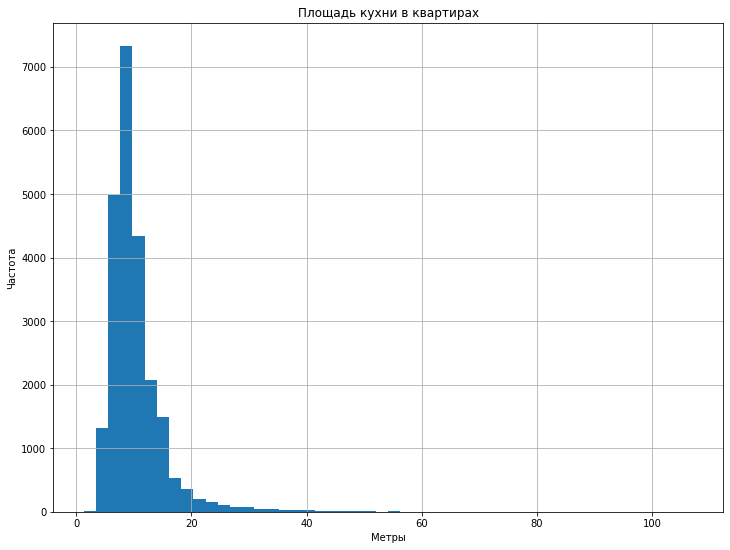

count              23,321.00
mean                   10.28
std                     5.25
min                     1.30
25%                     7.30
50%                     9.10
75%                    11.30
max                   107.00
Name: kitchen_area, dtype: float64

In [25]:
data2['kitchen_area'].hist(bins = 50, figsize = (12,9))           
plt.title('Площадь кухни в квартирах')
plt.xlabel('Метры')
plt.ylabel('Частота')
plt.show()

data2['kitchen_area'].describe()

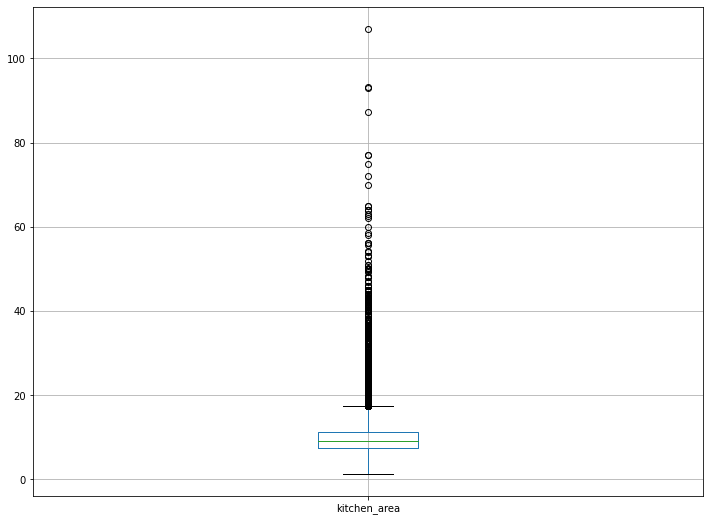

In [26]:
data2.boxplot('kitchen_area',figsize = (12,9))
plt.show()

Выбросов довольно много и они очень далеко от медианы. Предлагаю так же убрать те, которые находятся выше 50.

In [27]:
data2 = data2.query('kitchen_area <=50')
print(data2['kitchen_area'].describe())
data2['kitchen_area'].median()

count              23,288.00
mean                   10.21
std                     4.81
min                     1.30
25%                     7.30
50%                     9.10
75%                    11.30
max                    50.00
Name: kitchen_area, dtype: float64


9.1

Теперь данные приняли более распространенный вид. Исходя из графика выше, квартир с кухнями более 18 кв.м. довольно мало, более 40 кв.м. - практически не встречаются. А среднее значение площади кухни колеблется около 10 кв.м.

##### Цена объекта

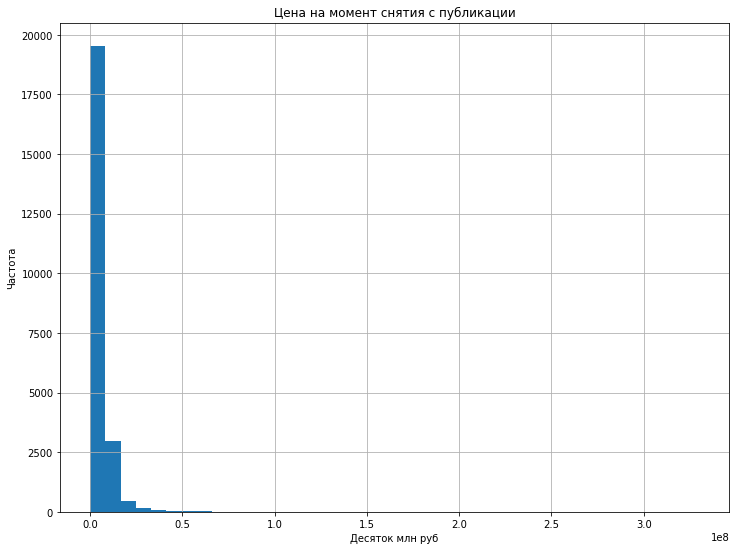

count              23,288.00
mean            6,014,183.48
std             6,209,276.50
min                12,190.00
25%             3,400,000.00
50%             4,600,000.00
75%             6,695,000.00
max           330,000,000.00
Name: last_price, dtype: float64

In [28]:
data2['last_price'].hist(bins = 40, figsize = (12,9))           
plt.title('Цена на момент снятия с публикации')
plt.xlabel('Десяток млн руб')
plt.ylabel('Частота')
plt.show()
data2['last_price'].describe()

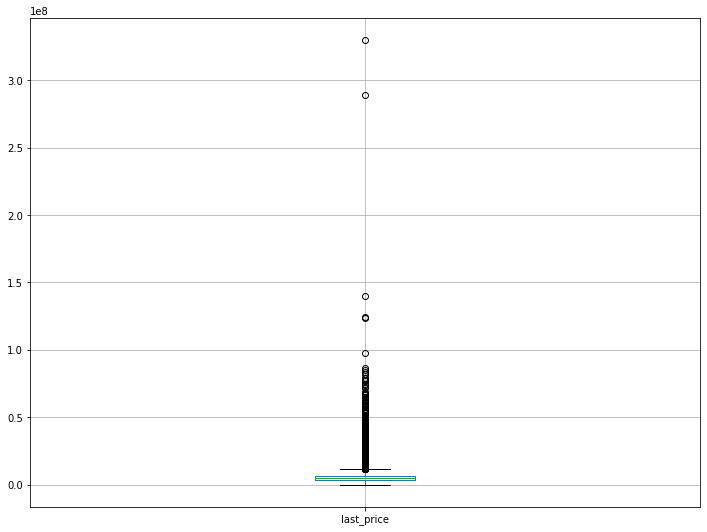

In [29]:
data2.boxplot('last_price',figsize = (12,9))
plt.show()

Тут совсем сильный разброс, думаю надо убрать все значения, которые больше 50 миллионов, и которые меньше 15 тысяч

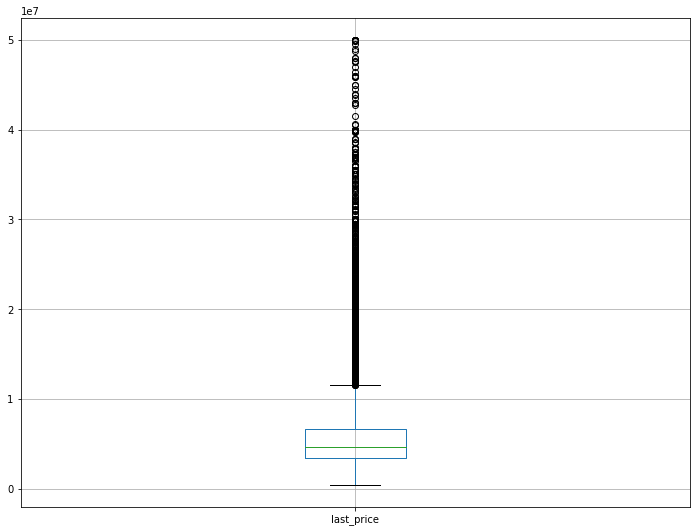

In [30]:
data2 = data2.query('15000 < last_price <= 50000000')
data2['last_price'].sort_values(ascending = False).head(20)
data2.boxplot('last_price',figsize = (12,9))
plt.show()

Исходя из полученных графиков можно сказать, что среди представленных квартир встречаются совершенно разные цены, цена разнится от 12 тысяч и до 100 миллионов. Но это скорее всего выбросы, и такие значения единичные. Основная масса лежит в диапазоне от 3.5 до 7.5 миллионов рублей.

##### Количество комнат

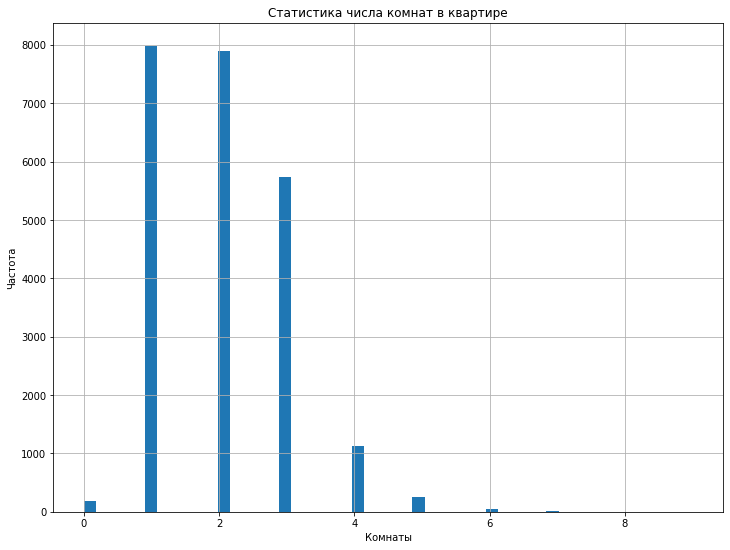

count              23,238.00
mean                    2.03
std                     0.99
min                     0.00
25%                     1.00
50%                     2.00
75%                     3.00
max                     9.00
Name: rooms, dtype: float64

In [31]:
data2['rooms'].hist(bins = 50, figsize = (12,9))  
plt.title('Статистика числа комнат в квартире')
plt.xlabel('Комнаты')
plt.ylabel('Частота')
plt.show()
plt.show()

data2['rooms'].describe()

In [32]:
data2['rooms'].sort_values(ascending = False).head(10)

8860     9
4435     8
8758     8
23555    7
17350    7
3545     7
4159     7
2462     7
3365     7
750      7
Name: rooms, dtype: int64

Выведем диаграмму ящика с усами и посмотрим как обстоят дела по распределению значений

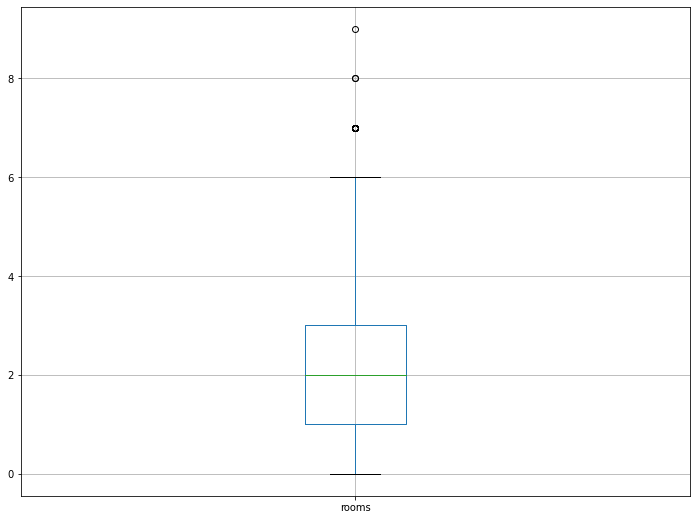

In [33]:
data2.boxplot('rooms',figsize = (12,9))
plt.show()

На графике видно, что значения больше 6 являются выбросами. Предлагаю удалить все значения, которые больше 6.


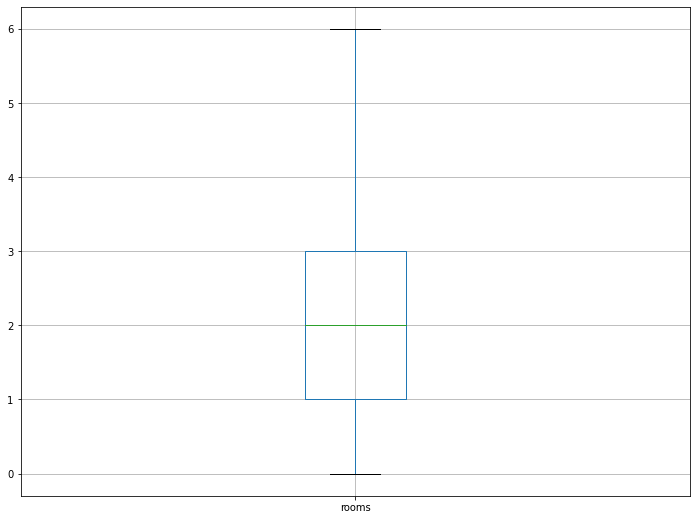

In [34]:
data2 = data2.query('rooms <=6')
data2.boxplot('rooms',figsize = (12,9))
plt.show()

Теперь выбросы совсем изчезли. Максимальное значение было 9 комнат, но мы ограничились 6.

##### Высота потолков

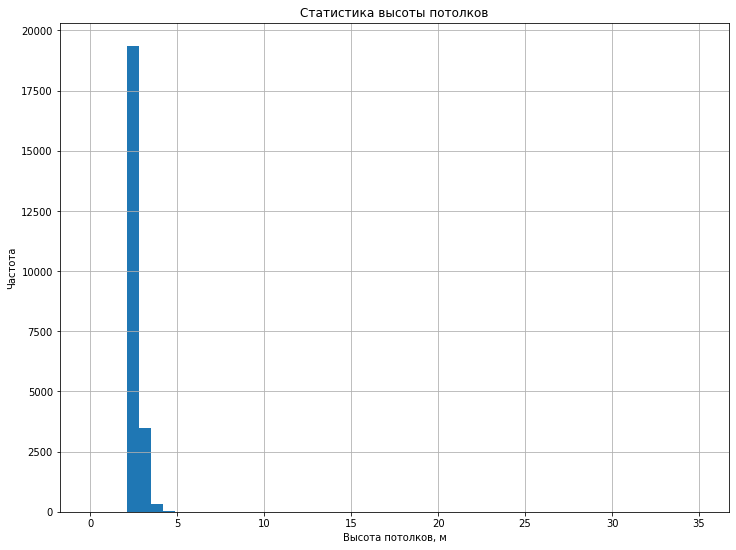

count              23,220.00
mean                    2.72
std                     1.00
min                     1.00
25%                     2.60
50%                     2.65
75%                     2.70
max                   100.00
Name: ceiling_height, dtype: float64

In [35]:
data2['ceiling_height'].hist(bins = 50, figsize = (12,9), range = (0, 35))  
plt.title('Статистика высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()
data2['ceiling_height'].describe()

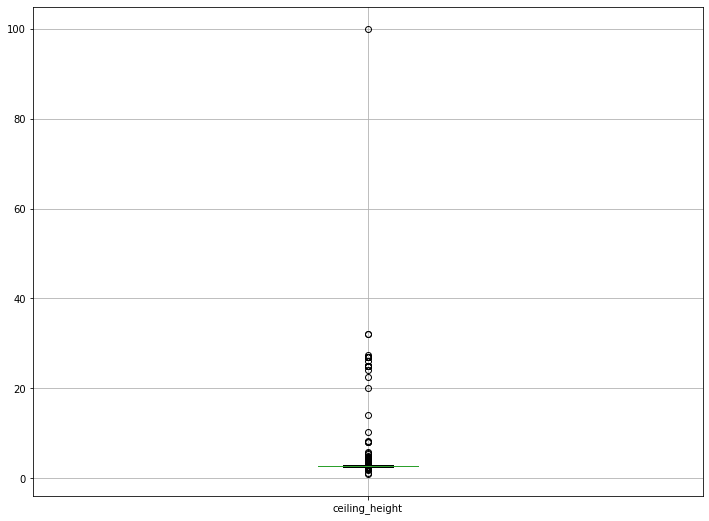

In [36]:
data2.boxplot('ceiling_height',figsize = (12,9))
plt.show()

По выводу общей информации о данных и графиках видно, что есть выбросы, которые достигают 100 метров. А речь идет о высоте потолков. Это точно неверное значение, которое придется удалить. А так же видно, что есть значения которые превышают 10 и 20 метров.

In [37]:
data2 = data2.query('2 < ceiling_height < 100')

In [38]:
data2['ceiling_height'].sort_values(ascending = False).head(20)

22336                  32.00
3148                   32.00
21377                  27.50
10773                  27.00
17857                  27.00
5246                   27.00
5807                   27.00
21824                  27.00
22938                  27.00
20478                  27.00
4876                   27.00
5669                   26.00
4643                   25.00
18545                  25.00
9379                   25.00
355                    25.00
11285                  25.00
6246                   25.00
14382                  25.00
5076                   24.00
Name: ceiling_height, dtype: float64

Можно догадаться, что в оставшихся значениях просто допустили ошибку. И что значение 32 это скорее всего 3,2 м.<br/>
Подкорректируем их.

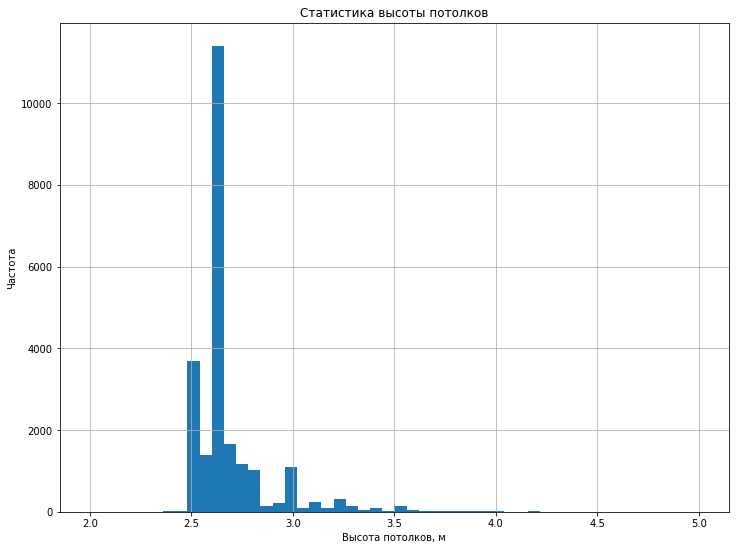

In [39]:
data2['ceiling_height'].hist(bins = 50, figsize = (12,9), range = (2, 5))   
plt.title('Статистика высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

На увеличенной гистограмме ниже видно, что адекватной высотой потолков считается высота от 2.5 м примерно до 4.5 м. На эти цифры будем опираться. Для начала возьмем все что выше 5 метров и поделим их на 10. Выведем часть получившихся данных.

In [40]:
data2.loc[data2['ceiling_height'] > 5,'ceiling_height'] = data2.loc[data2['ceiling_height'] > 5,'ceiling_height']/10
data2['ceiling_height'].sort_values(ascending = False).head(20)

1053                    5.00
2802                    4.80
19142                   4.70
13224                   4.50
14519                   4.50
6802                    4.50
3067                    4.50
2823                    4.50
10159                   4.50
11651                   4.40
7274                    4.40
4201                    4.37
10754                   4.30
17078                   4.25
20873                   4.20
2843                    4.20
6901                    4.20
22055                   4.20
11128                   4.20
19041                   4.20
Name: ceiling_height, dtype: float64

Уже больше похоже на правду, но что у нас с самыми маленькими значениями, а заодно проверим график


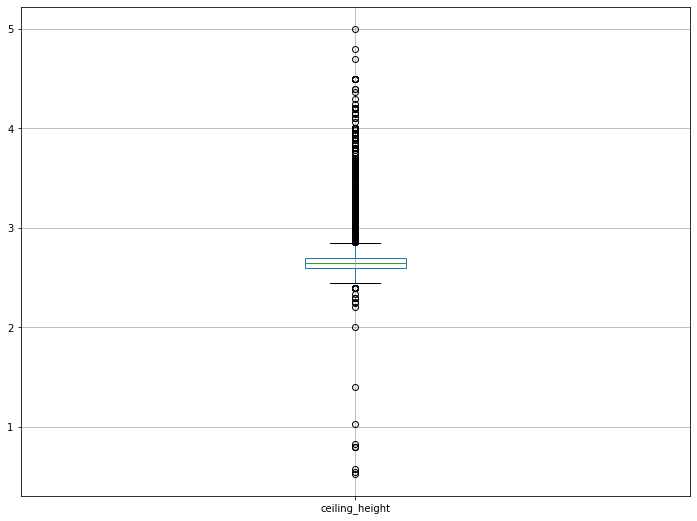

In [41]:
data2['ceiling_height'].sort_values(ascending = False).tail(20)
data2.boxplot('ceiling_height',figsize = (12,9))
plt.show()

Значения ниже 2.4 и выше 4 метров очень сильно выбиваются. Снова применим фильтр и удалим все, что ниже 2.4м, и больше 4 метров

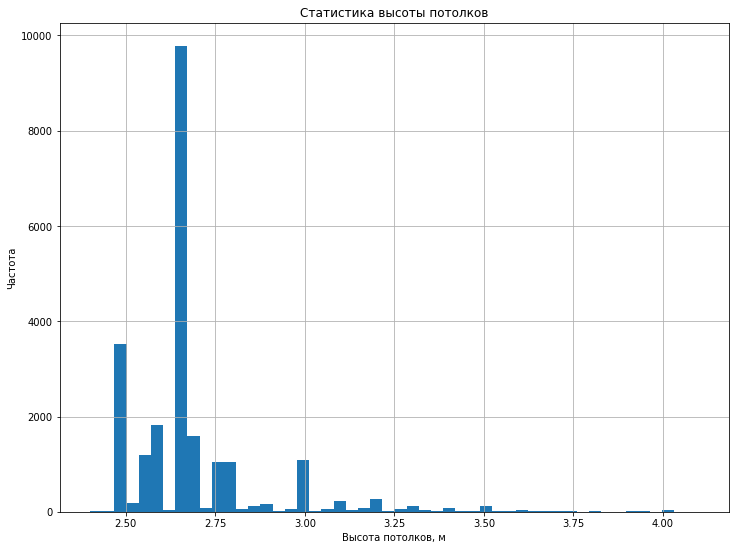

In [42]:
data2 = data2.query('2.4 <= ceiling_height <= 4')
data2['ceiling_height'].hist(bins = 50, figsize = (12,9), range = (2.4, 4.1))  
plt.title('Статистика высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.show()

##### Тип этажа

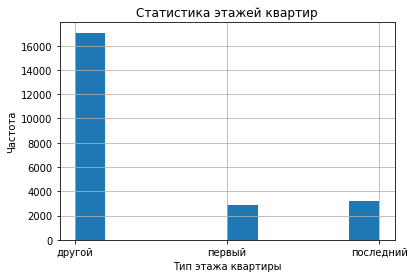

type_of_floor
другой       17069
первый        2867
последний     3220
Name: rooms, dtype: int64

In [43]:
data2['type_of_floor'].hist()
plt.title('Статистика этажей квартир')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Частота')
plt.show() 
#выведем количество по типам этажей
data2.groupby('type_of_floor')['rooms'].count()

По графику видно, что значительное большинство квартир находится не на первом и не на последнем этаже, что вполне логично. На первый и последний этаж приходится почти одинаковое количество обьявлений, но все равно, таких обьявлений меньше почти в 6 раз.

##### Общее количество этажей в доме

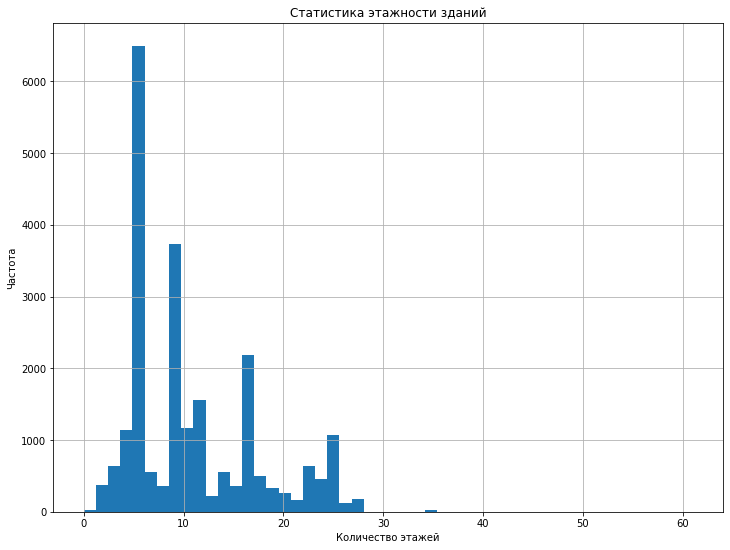

count              23,156.00
mean                   10.74
std                     6.61
min                     1.00
25%                     5.00
50%                     9.00
75%                    16.00
max                    60.00
Name: floors_total, dtype: float64

In [44]:
data2['floors_total'].hist(bins = 50, figsize = (12,9), range = (0, 61))   
plt.title('Статистика этажности зданий')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()
data2['floors_total'].describe()

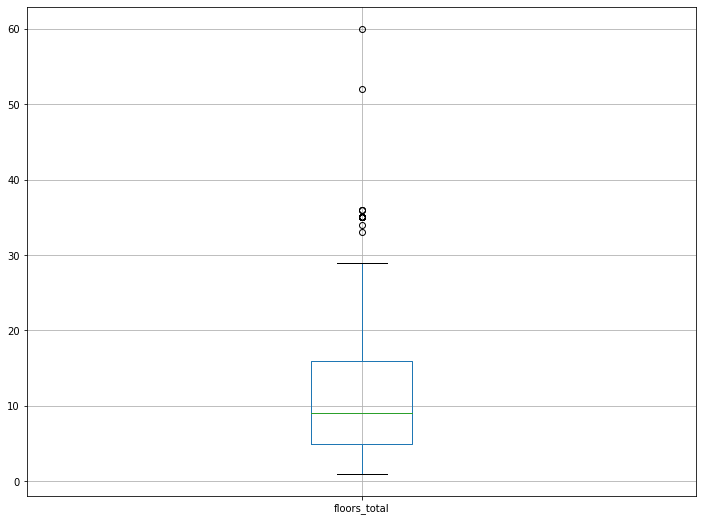

In [45]:
data2.boxplot('floors_total',figsize = (12,9))
plt.show()

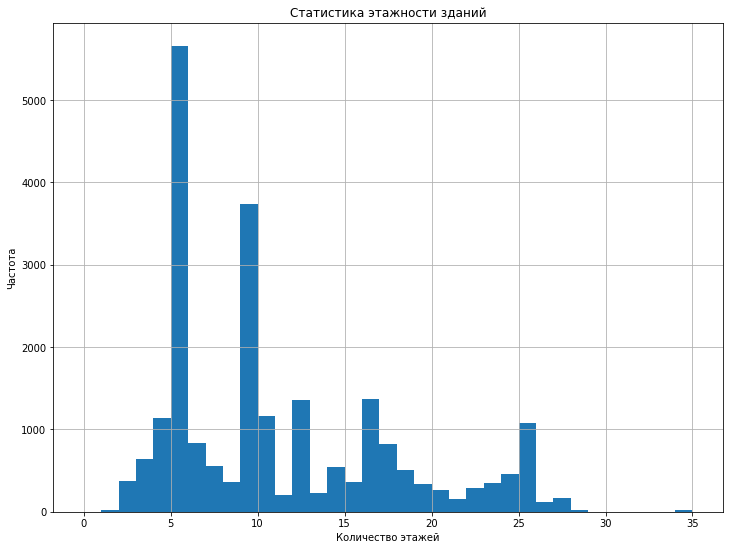

In [46]:
#Отсечем значения больше 30, они слишком редкие
data2 = data2.query('floors_total <= 35')
data2['floors_total'].hist(bins = 35, figsize = (12,9), range = (0, 35))
plt.title('Статистика этажности зданий')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

По графику отчетливо видно, что самыми распространенными видами домов являются 5-этажки и 9-этажки. Такие выводы можно подтвердить жизенным опытом, это дейтсвительно самый распространенный тип домов. Так же популярны 13, 16 и 25 этажные здания. Все остальное уже просто относится к нетиповым индивидуальным многоэтажным застройкам.

##### Расстояние до центра города в метрах

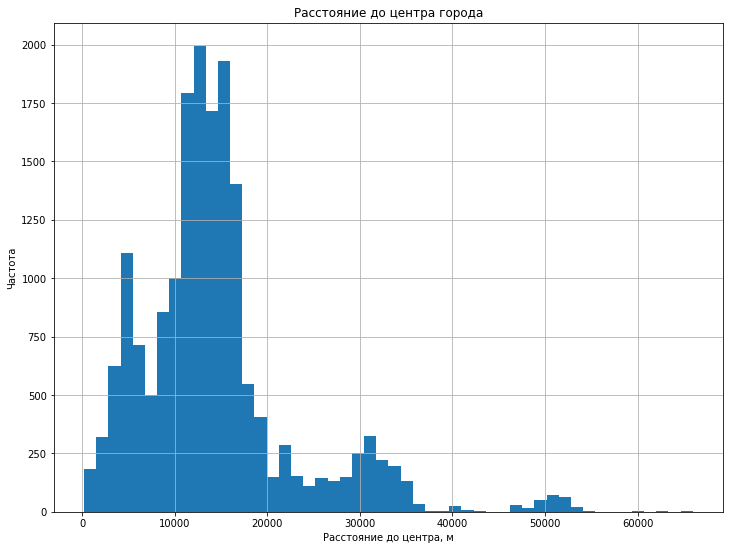

count              17,682.00
mean               14,349.15
std                 8,582.96
min                   181.00
25%                 9,551.00
50%                13,199.00
75%                16,360.00
max                65,968.00
Name: cityCenters_nearest, dtype: float64

In [47]:
data2['cityCenters_nearest'].hist(bins = 50, figsize = (12,9))   
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Частота')
plt.show()
data2['cityCenters_nearest'].describe()

Данные, которые больше 55км кажутся неправдоподобными. Думаю тут какая-то ошибка, эти данные лучше исключить для выведения гистограммы. 

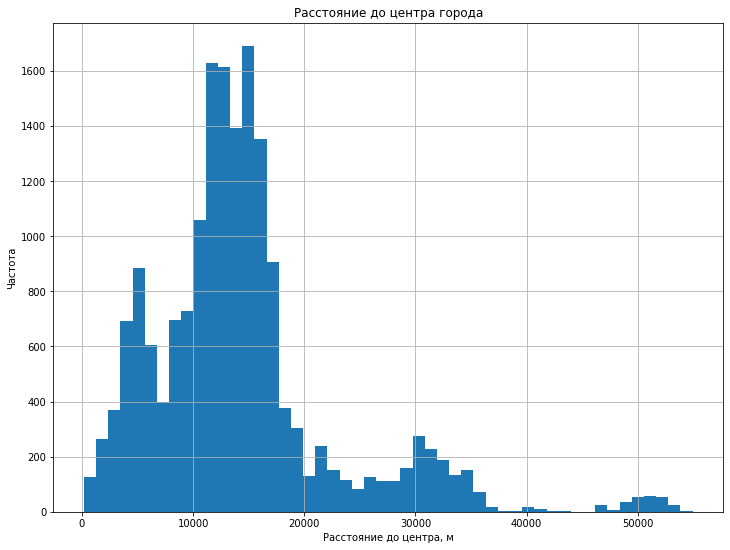

In [48]:
data2.query('cityCenters_nearest < 55000 or cityCenters_nearest.isna()')['cityCenters_nearest'].hist(bins = 50, figsize = (12,9)) 
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Частота')
plt.show()

На графике можно заметить что основным радиусом продажи квартир является 10-18км от центра. Следом идут обьявления которые находятся в 4-5 км от центра.

##### Ближайшие парки

Из-за большого колличества пропусков было принято решение исключить такой показатель, как ближайшие парки, потому что пропуски в этом столбце встречались в почти 65% всех строк. Можно вывести статистику по паркам в радиусе 3км

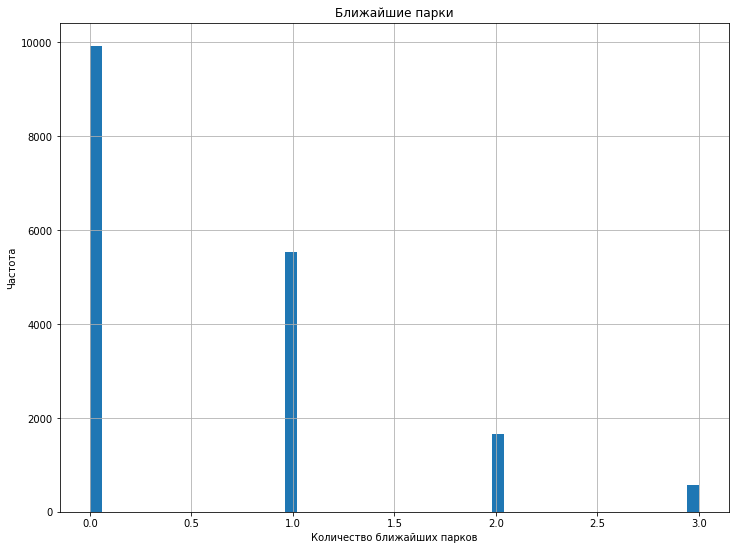

count              17,683.00
mean                    0.60
std                     0.79
min                     0.00
25%                     0.00
50%                     0.00
75%                     1.00
max                     3.00
Name: parks_around3000, dtype: float64

In [49]:
data2['parks_around3000'].hist(bins = 50, figsize = (12,9))      
plt.title('Ближайшие парки')
plt.xlabel('Количество ближайших парков')
plt.ylabel('Частота')
plt.show()
data2['parks_around3000'].describe()

Все выглядит вполне логично. Менять нечего. Чаще всего парков рядом просто нет, либо информация о них не указана.

#### Посмотрим, как быстро продавались квартиры

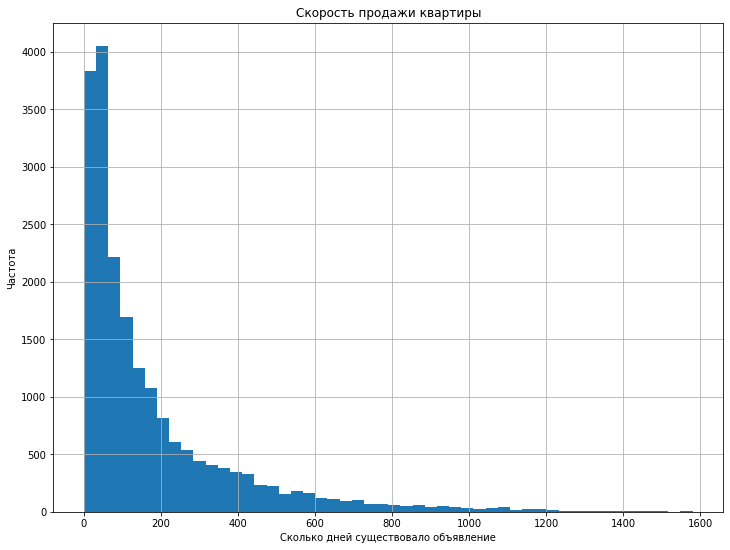

count              20,065.00
mean                  179.28
std                   218.14
min                     1.00
25%                    45.00
50%                    95.00
75%                   229.00
max                 1,580.00
Name: days_exposition, dtype: float64

In [50]:
data2['days_exposition'].hist(bins=50, figsize = (12,9))
plt.title('Скорость продажи квартиры')
plt.xlabel('Сколько дней существовало объявление')
plt.ylabel('Частота')
plt.show()
data2['days_exposition'].describe()

In [51]:
print('Среднее:', data2['days_exposition'].mean())
print('Медиана:', data2['days_exposition'].median())

Среднее: 179.27939197607776
Медиана: 95.0


Так как медиана менее подвержена влиянию выбросов на значение, и учитывая то, что среднее значение в 2 раза больше медианы, можем сделать вывод что у нас имеются довольно сильные выбросы, которые стоит проверить и удалить.

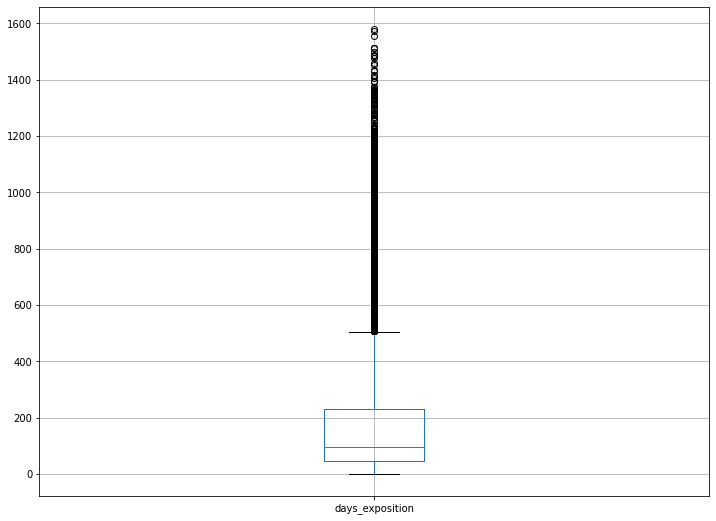

In [52]:
data2.boxplot('days_exposition',figsize = (12,9))
plt.show()

In [53]:
data2['days_exposition'].sort_values(ascending = False).head(20)
print(data2.loc[data2['days_exposition'] > 1200]['days_exposition'].count())
print(data2.loc[data2['days_exposition'] > 1000]['days_exposition'].count())
print(data2.loc[data2['days_exposition'] > 800]['days_exposition'].count())
print(data2.loc[data2['days_exposition'] > 700]['days_exposition'].count())

85
262
565
821


Объявлений, которые были выставлены дольше 1200 дней, а это больше 3 лет, всего 85. А тех, которые существовали больше 1000 дней 262. Думаю можно отсечь все значения, которые меньше 800, это не сильно повредит данным.


Среднее: 154.79330153356926
Медиана: 90.00000000000001


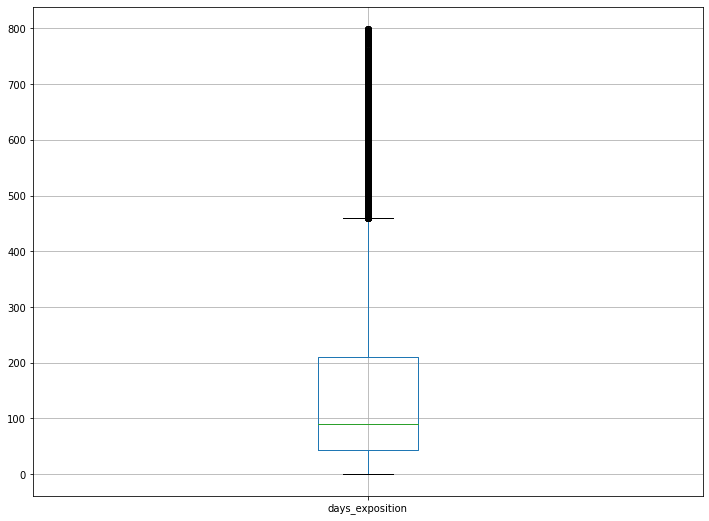

In [54]:
data2 = data2.query('days_exposition < 800 or days_exposition.isna()')
print('Среднее:', data2['days_exposition'].mean())
print('Медиана:', data2['days_exposition'].median())
data2['days_exposition'].describe()
data2.boxplot('days_exposition',figsize = (12,9))
plt.show()

Теперь среднее значение и медиана стали больше похожи, это хороший знак. Значит мы действительно избавились от выбросов. <br/>
Также, по диаграмме размаха мы можем сделать выводы, что обычно продажа занимает около 90 дней. Быстрыми будем считать все продажи, которые случились до 44 дней, а необычно долгими будем считать то, что вышло за пределы "усов" нашей диаграммы, то есть 249(длина уса)+210 = 459. Получается необычно долгими мы будем начинать считать обьявления, которые существовали больше 459 дней.<br/>

#### Далее мы рассмотрим влияние разных факторов на изменение цены

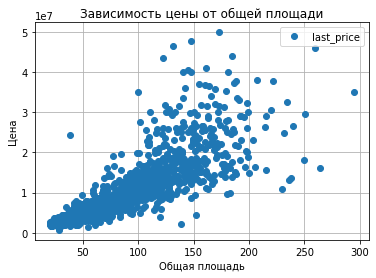

Коэффициент корреляции составляет: 0.7648963090660086


In [55]:
#выводим диаграмму рассеяния и коэффициент корреляции для Общей площади
data2.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median').plot(xlabel = 'Общая площадь', ylabel = 'Цена',style = 'o',grid = True)
plt.title('Зависимость цены от общей площади')
plt.show()
print('Коэффициент корреляции составляет:', data2['total_area'].corr(data2['last_price']))

По диаграмме рассеивания видно, что у цены и общей площади есть почти прямая зависимость - чем больше общая площадь, тем больше цена за квартиру, конечно за редкими исключениями, ведь на цену влияют еще и другие показатели. <br/>
А так же в подтверждение сильной зависимости могу привести коэффициент корреляции, который составляет 0.76, что является довольно большим показателем. 

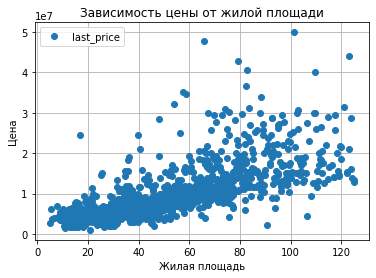

Коэффициент корреляции составляет: 0.6079770913881976


In [56]:
#выводим диаграмму рассеяния и коэффициент корреляции для Жилой площади
data2.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median').plot(xlabel = 'Жилая площадь', ylabel = 'Цена',style = 'o',grid = True)
plt.title('Зависимость цены от жилой площади')
plt.show()
print('Коэффициент корреляции составляет:', data2['living_area'].corr(data2['last_price']))

На данной диаграмме тоже прослеживается зависимость, но не такая сильная, как в пункте выше. С увеличением жилой площади цена растет, но чуть менее интенсивнее. Коэффициент корреляции составляется 0.61, что тоже не мало. Делаем вывод, что зависимость есть.

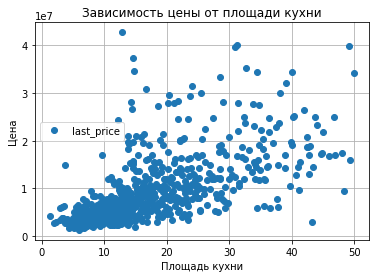

Коэффициент корреляции составляет: 0.5554494184634563


In [57]:
#выводим диаграмму рассеяния и коэффициент корреляции для Площади кухни
data2.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median').plot(xlabel = 'Площадь кухни', ylabel = 'Цена',style = 'o',grid = True)
plt.title('Зависимость цены от площади кухни')
plt.show()
print('Коэффициент корреляции составляет:', data2['kitchen_area'].corr(data2['last_price']))

На данном графике взаимосвязи площади кухни и цены зависимость прослеживается уже менее явно, и коэффициент корреляции тоже меньше, и равен 0.56. Но все таки зависимость есть, большинстве случаев, чем больше площадь кухни, тем больше цена.

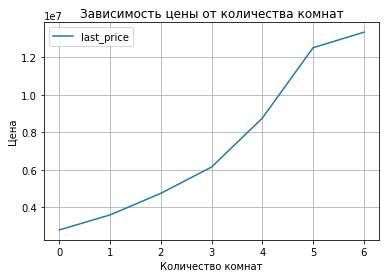

Коэффициент корреляции составляет: 0.4645856531079473


In [58]:
#выводим линейный график зависимости и коэффициент корреляции для Количества комнат
data2.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(xlabel = 'Количество комнат', ylabel = 'Цена',style = '-',grid = True)
plt.title('Зависимость цены от количества комнат')
plt.show()
print('Коэффициент корреляции составляет:', data2['rooms'].corr(data2['last_price']))

По графику зависимость прослеживается достаточно явно, чем больше комнат, тем больше цена. Но вот коэффициент корреляции меньше чем у других показателей. Все таки сделаем вывод, что зависимость есть, и она достаточно сильная.

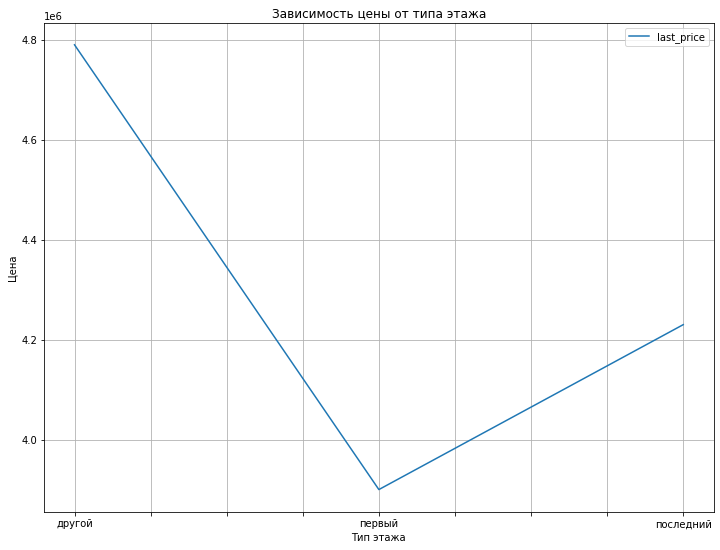

,count,median,mean
type_of_floor,,,
другой,16658,"4,790,000.00","6,060,851.20"
последний,3135,"4,230,000.00","5,535,209.13"
первый,2790,"3,900,000.00","4,543,076.98"


In [59]:
#выводим график зависимости медианы цены от типа этажа
data2.pivot_table(index = 'type_of_floor', values = 'last_price', aggfunc = 'median').plot(xlabel = 'Тип этажа', ylabel = 'Цена',style = '-',grid = True,figsize= (12,9))
plt.title('Зависимость цены от типа этажа')
plt.show()
type_of_fl = data2.pivot_table(index = 'type_of_floor', values = 'last_price',aggfunc = ['count', 'median','mean'])
type_of_fl.columns = type_of_fl.columns.get_level_values(0)
type_of_fl.sort_values(by = 'median',ascending = False)


По графику медианных значений цены для каждого типа этажа можно сделать вывод, что первый этаж оценивается меньше всех, там самая низкая цена. Далее идет последний этаж, он имеет уже большую цену, чем первый, но различие не особо явное. И самым дорогим вариантом получаются все остальные этажи, в категории "Другие". Их медиана цены уже достаточно выше, чем на первых и последних.

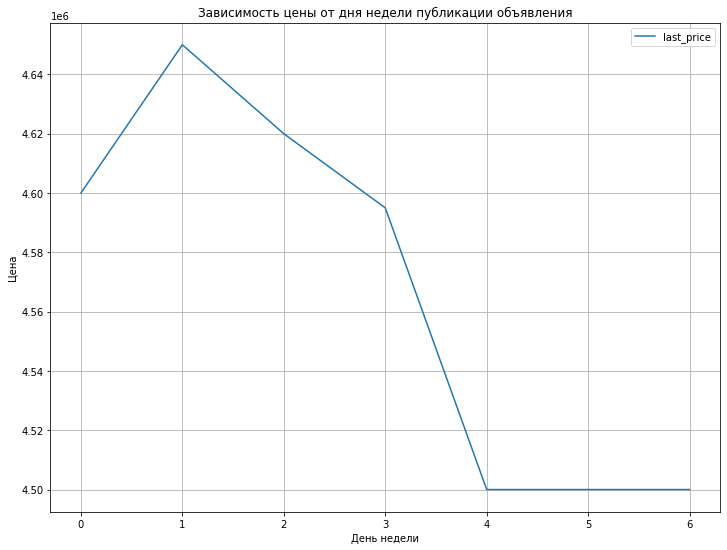

,count,median,mean
weekday_of_exp,,,
1,3984,"4,650,000.00","5,797,361.93"
2,3767,"4,620,000.00","5,875,539.73"
0,3453,"4,600,000.00","5,847,130.98"
3,4065,"4,595,000.00","5,916,180.72"
4,3848,"4,500,000.00","5,709,666.52"
5,1851,"4,500,000.00","5,656,422.35"
6,1615,"4,500,000.00","5,622,058.25"


In [60]:
#выводим график зависимости медианы цены от дня недели публикации объявления
data2.pivot_table(index = 'weekday_of_exp', values = 'last_price', aggfunc = 'median').plot(xlabel = 'День недели', ylabel = 'Цена',style = '-',grid = True,figsize= (12,9))
plt.title('Зависимость цены от дня недели публикации объявления')
plt.show()
weekday_of = data2.pivot_table(index = 'weekday_of_exp', values = 'last_price',aggfunc = ['count', 'median','mean'])
weekday_of.columns = weekday_of.columns.get_level_values(0)
weekday_of.sort_values(by = 'median',ascending = False)


Хоть график и не представляет из себя прямую линию, но если присмотреться к значениям, то различие медиан по дням недели не такое значительное, для того чтобы сказать что от дня недели сильно зависит цена. Делаем вывод, что тут зависимости почти нет.

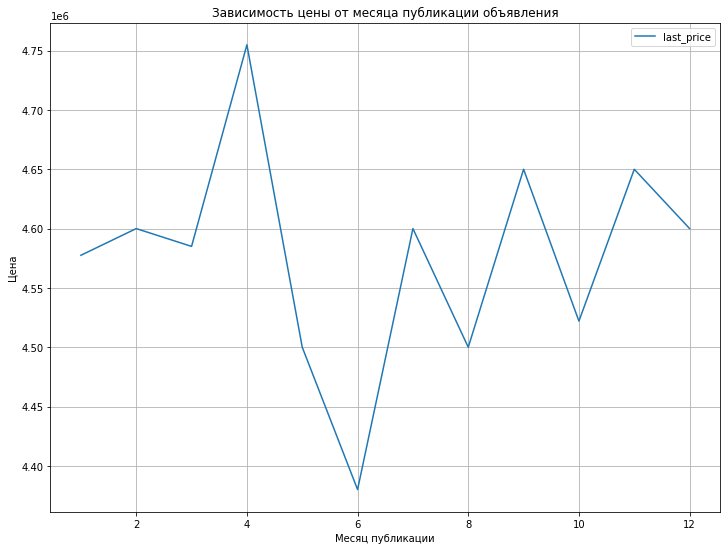

,count,median,mean
mounth_of_exp,,,
4,2283,"4,754,940.00","5,842,738.21"
9,1887,"4,650,000.00","5,860,871.74"
11,2272,"4,650,000.00","5,901,363.58"
2,2537,"4,600,000.00","5,878,457.83"
7,1604,"4,600,000.00","5,724,628.83"
12,1530,"4,600,000.00","5,785,061.00"
3,2437,"4,585,000.00","5,695,883.70"
1,1422,"4,577,500.00","5,904,209.94"
10,2041,"4,522,000.00","5,636,380.41"


In [61]:
#выводим график зависимости медианы цены от месяца публикации объявления
data2.pivot_table(index = 'mounth_of_exp', values = 'last_price', aggfunc = 'median').plot(xlabel = 'Месяц публикации', ylabel = 'Цена',style = '-',grid = True,figsize= (12,9))
plt.title('Зависимость цены от месяца публикации объявления')
plt.show()
mounth_of = data2.pivot_table(index = 'mounth_of_exp', values = 'last_price',aggfunc = ['count', 'median','mean'])
mounth_of.columns = mounth_of.columns.get_level_values(0)
mounth_of.sort_values(by = 'median',ascending = False)


График представляет из себя хаотично ломанную линию, которая меняет значения не поддаваясь какой либо логике, а так же медиана цены колеблется в небольшом диапазоне, что позволяет нам сделать вывод, что от месяца цена не зависит.

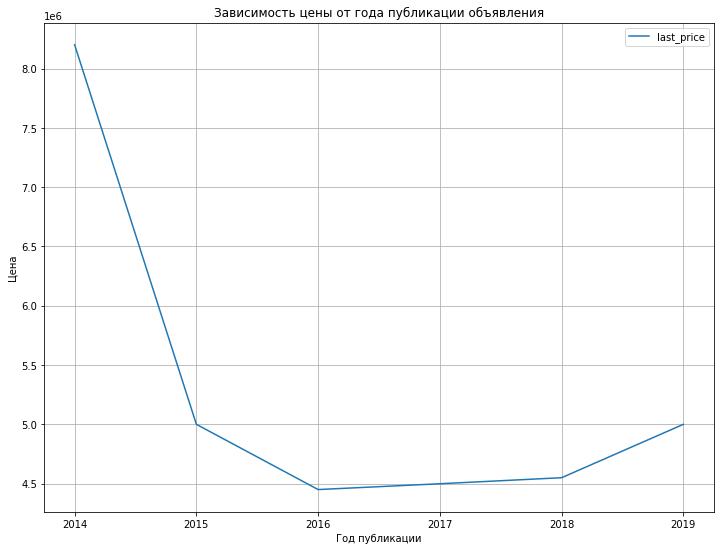

,count,median,mean
year_of_exp,,,
2014,68,"8,200,000.00","11,468,554.65"
2015,792,"5,000,000.00","6,642,098.66"
2019,2828,"5,000,000.00","6,175,680.86"
2018,8366,"4,550,000.00","5,598,420.78"
2017,8003,"4,499,000.00","5,719,024.08"
2016,2526,"4,450,000.00","5,890,244.39"


In [62]:
#выводим график зависимости медианы цены от года публикации объявления
data2.pivot_table(index = 'year_of_exp', values = 'last_price', aggfunc = 'median').plot(xlabel = 'Год публикации', ylabel = 'Цена',style = '-',grid = True,figsize= (12,9))
plt.title('Зависимость цены от года публикации объявления')
plt.show()
year_of = data2.pivot_table(index = 'year_of_exp', values = 'last_price',aggfunc = ['count', 'median','mean'])
year_of.columns = year_of.columns.get_level_values(0)
year_of.sort_values(by = 'median',ascending = False)


График как будто однозначно показывает, что с годами сильно упала цена на квартиры, но данный вывод ошибочный. <br/> Если посмотреть в сводную таблицу в колонку с количеством обьявлений, то можно заметить что за 2014 и 2015 год в сотни раз меньше объявлений, чем в другие годы, что позволяет нам сомневаться в достоверности. Думаю, такое поведение графика связано с тем, что объявления, которые остались опубликованы 4-5 лет имели неадекватно высокую цену, из-за чего квартиры все еще никто не купил. Исключив эти 2 года мы получим график, который плавно растет. Показатели за оставшиеся годы не сильно разнятся в медиане. Вывод такой, что от года цена квартиры зависит минимально.

**Вывод:** цена зависит сильнее всего от количества комнат и общей площади квартиры, далее по убыванию на цену оказывают влияние жилая площадь и площадь кухни. Небольшую роль играет этаж, востребованнее всего квартиры которые не на первом и не на последних этажах. Далее идет год публикации, чем новее объявление, тем выше цена. И почти никак не влияют день недели и месяц публикации объявления, но справедливости ради, цены ниже на те квартиры, которые были опубликованы на выходных и в июне.

#### Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [63]:
local_names = data2.pivot_table(index = 'normalized_locality_name', values = 'price_m2',aggfunc = ['count','mean'])
local_names.columns = local_names.columns.get_level_values(0)
(local_names.sort_values(by = 'count',ascending = False).head(10)).sort_values(by = 'mean', ascending = False)

,count,mean
normalized_locality_name,,
санкт-петербург,14883,"111,912.50"
пушкин,348,"102,632.93"
кудрово,459,"95,342.98"
парголово,321,"90,235.72"
мурино,572,"86,156.51"
шушары,431,"78,450.32"
колпино,333,"75,275.84"
гатчина,297,"68,892.15"
всеволожск,387,"68,711.34"


Отсортировав сводную таблицу дважды, сперва по количеству обьявлений, а затем по среднему значению цены за квадратный метр, мы получили таблицу, в которой показаны 10 населенных пунктов с набольшим количеством объявлений и среди них выявлены самые высокие и самые низкие показатели цены. <br/>
<br/>
**Вывод:** Наибольшее количество объявлений и наибольшая средняя цена за 1 квадратный метр как ни странно у Санкт-Петербурга: объявлений там больше 50% от всего датасета, а средний показатель цены равен 111912 за метр. <br/>
<br/>
Наименьшая цена в Выборге, она меньше почти в 2 раза и составляет 58319 за метр.

#### Как изменяется цена квартиры в зависимости ее удаленности от центра Санкт-Петербурга


In [64]:
# Создадим отдельный датафрейм куда поместим только обьявления из Санкт-Петербурга
spb_flats = data2.query('locality_name == "Санкт-Петербург"')
#для наглядности округлим результаты до целого вверх
spb_flats['cityCenter_km'] = spb_flats['cityCenter_km'].round()
# Выведем сводную таблицу по километрам удаленности от центра и среднему значению цены квартиры
spb_flats.pivot_table(index = 'cityCenter_km', values = 'last_price', aggfunc = ('mean','count'))

#дополнительно выведен столбик с количеством объявлений на каждый км, так как далее это потребовалось для подробного анализа.

,count,mean
cityCenter_km,,
0.00,16,"17,429,937.50"
1.00,158,"12,044,746.83"
2.00,254,"11,709,775.59"
3.00,311,"9,770,444.86"
4.00,613,"10,615,349.32"
5.00,788,"11,289,917.76"
6.00,543,"11,029,739.18"
7.00,384,"11,169,099.07"
8.00,561,"8,887,973.73"


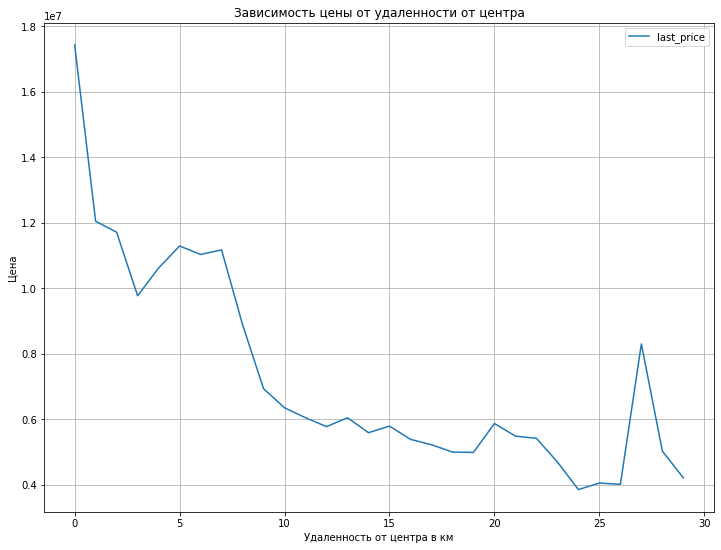

In [65]:
#построим график отображающий зависимость средней цены квартиры от значения удаленности от центра учитывая каждый километр
spb_flats.pivot_table(index = 'cityCenter_km', values = 'last_price', aggfunc = 'mean').plot(xlabel = 'Удаленность от центра в км', ylabel = 'Цена',style = '-',grid = True,figsize= (12,9))
plt.title('Зависимость цены от удаленности от центра')
plt.show()

Нетрудно заметить то, что график идет на спад с каждым километром, но в районе 27 километра есть некая анномалия, похожая на выброс. Проверим поближе, что там произошло:

In [66]:
spb_flats.query('cityCenter_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,ponds_around3000,days_exposition,normalized_locality_name,price_m2,weekday_of_exp,mounth_of_exp,year_of_exp,type_of_floor,cityCenter_km
748,13,"14,350,000.00",74.00,2017-11-28,2,3.13,5,30.00,3,False,...,1,0,128.00,санкт-петербург,"193,918.92",1,11,2017,другой,27.00
5961,6,"2,250,000.00",32.00,2018-02-27,1,2.65,2,16.50,2,False,...,0,0,178.00,санкт-петербург,"70,312.50",1,2,2018,последний,27.00


Оказывается, на 27 километр приходится всего 2 обьявления, и цена у них координально различается, отсюда такой выброс на графике. Сравнивая с количеством объявлений на других километрах, это самое непопулярное расстояние в объявлениях, исходя из чего можем сделать вывод, что опираться на такие данные нужно с осторожностью. <br/>
Считаю что данным выбросом можно пренебречь и считать график цены равномерно идущим на спад, с каждым последующим киллометром удаления от центра.<br/>
<br/>
**Вывод:** чем дальше от центра, тем меньше средняя цена на квартиру

### Общий вывод


**Исходные данные**<br/><br/>
При считывании csv-файла с базой данных, были обнаружены пропуски в большинстве колонок. Те из них, которые возможно было восстановить близкими по логике значениями были восстановлены, а те, восстановить которые было невозможно - удалены. <br/><br/>
Также, данные были проверены на наличие нелогичных значений или сильных выбросов. Такие значения отсеивались, и не учитывались при дальнейшем анализе.<br/>
К сожалению, в столбцах которые отображали расстояние до ближайших парков и прудов было больше 65% пропусков, поэтому данные факторы были исключены из дальнейшнего анализа.<br/><br/>
**Ответы на поставленные цели**<br/><br/>
Целью всего исследования было узнать как влияют различные характеристики квартиры и дата публикации объявления о продаже на цену квартиры. Зависимости были обнаружены, и вот выводы которые удалось получить:<br/><br/>

1. Как долго могли продаваться квартиры?<br/><br/>
В ходе анализа было обнаружено, что объявления могли существовать и 1 день, и даже более 4 лет. <br/>
Обычно продажа занимает около 90 дней. Быстрыми будем считать все продажи, которые случились до 44 дней, а  необычно долгими мы будем начинать считать обьявления, которые существовали больше 459 дней.<br/><br/>

2. Влияние показателей общей, жилой и площади кухни на цену.<br/><br/>
Площадь среди остальных показателей больше всего влияет на цену, особенно общая площадь квартиры. Следом за ней по важности идет жилая площадь и площадь кухни.<br/>
Коэффициенты корреляции представлены в таблице ниже(чем больше число, тем больше зависимость) <br/>
    
| Площадь | Коэффициент корреляции |
| ------------- | ------------- |
| Общая| 0,76  |
| Жилая  | 0,61  |
| Кухня  | 0,56 |

Важно отметить, что один из самых значимых показателей от которого зависит цена - это количество комнат. Но врятли у нас будет много комнат, и меньшая площадь. Считаю что эти параметры напрямую связаны, но как итог: чем больше комнат в квартире, тем выше цена.<br/><br/>
3. Как влияет на цену этаж, на котором находится квартира?.<br/><br/>
Все этажи были поделены на 3 типа: «первый», «последний», «другой». И была выявлена такая зависимость, что квартиры которые находятся на первом и последнем этаже оцениваются дешевле. Ниже всех цена на 1 этаж.<br/>
Медианные значения строимости квартир представлены в таблице ниже <br/>

| Тип этажа | Цена(медиана), млн р |
| ------------- | ------------- |
| Другой  | 4,790,000  |
| Последний  | 4,230,000  |
| Первый  | 3,900,000  |

4. Есть ли зависимость между датой публикации и ценой квартиры?<br/><br/>
Были рассмотрены зависимости дня недели, месяца и года публикации объявления о продаже и цены на квартиру. Сильных зависимостей выявлено не было. <br/>
Но из тех выводов, которые были заметны, можно выделить такую закономерность, что ниже всего цена была, если объявление выложено:<br/>
  <br/>
    -на выходных(пт-вс)<br/>
    -в период май-июнь<br/>
    -в период с 2016-2017 год<br/>
    <br/>
Зависимость цены от данных показателей настолько мала, что принимать ее в счет не будем.<br/><br/>
    
5. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.<br/><br/>
Были отобраны 10 населенных пунктов, с наибольшим количеством объявлений. Ниже будет представлена таблица, в которой будет указана средняя цена по каждому из этих населенных пунктов.
| Населенный пункт| Кол-во объявлений | Средняя цена | 
| ------------- | ------------- | ------------- |
| Санкт-Петербург	|14883 | 111,912.50
| Пушкин	| 348 |	102,632.93
| Кудрово	| 290 |	92,521.24
| Парголово | 321 |	90,235.72
| Мурино	| 506 |	85,793.52
| Шушары	| 431 |	78,450.32
| Колпино	| 333 |	75,275.84
| Гатчина	| 297 |	68,892.15
| Всеволожск | 387 | 68,711.34
| Выборг	| 227 |	58,319.23

Наибольшее количество объявлений и наибольшая средняя цена за 1 квадратный метр как ни странно у Санкт-Петербурга: объявлений там больше 50% от всего датасета, а средний показатель цены равен 111912 за метр.<br/>
Наименьшая цена в Выборге, она меньше почти в 2 раза и составляет 58319 за метр.<br/><br/>

6. Как изменяется цена квартиры в зависимости ее удаленности от центра Санкт-Петербурга?<br/><br/>
Вывод очевиден, и он звучит так, что чем дальше от центра квартира, тем ниже цена.<br/>
    В доказательство приведу данные из таблицы по нескольким первым и последним км:
| Км от центра| Средняя цена | 
| ------------- | ------------- | 
| 0.00	| 17,429,937.50 |
| 1.00	| 12,044,746.83 |
| 2.00	| 11,709,775.59 |
| ------------- | ------------- | 
| 26.00	| 4,014,287.05 |
| 27.00	| 8,300,000.00 |
| 28.00	| 5,026,428.57 |
| 29.00	| 4,210,000.00 |

**Общие рекомендации** <br/><br/>
Сильнее всего на цену квартиры влияют такие показатели как площадь, количество комнат, и удаленность от центра. Чуть меньшее влияние оказывает этаж, на котором находится квартира. Самым дорогим вариантом будет большая по площади квартира, с большим количеством комнат, находящаяся в самом центре Санкт-Петербурга, и на любом этаже, кроме первого и последнего. Ну не мечта ли)